<img src='images/header.png' style='height: 50px; float: left'>

## Introduction to Computational Social Science methods with Python

# Session D2. Macro-level network analysis and network modeling

In the previous [Session D1. Micro-level network analysis and community detection](1_micro_level_network_analysis_and_community_detection.ipynb), we have encountered community structure as a meso-level pattern above the micro level. Communities are meso-level phenomena because they are aggregated components that make up the whole at the macro level. Hence, community structure is a way of describing **network connectivity**, the way the whole network is connected or disconnected. In macro-level network analysis, all nodes and edges are taken into account, as shown in the right panel of ***figure 1***.

|<img src='images/levels.png' style='float: right; width: 480px'>|
|:--|
|<em style='float: center'>**Figure 1**: Levels in network analysis</em>|

There are several research problems in the social sciences where quantifying connectivity at the macro level is important and where network analysis provides key insights. Questions about **social cohesion** lie at the core of sociology. This is the problem to what extent members of a population form a connected whole and feel emotionally attached to the prevalent rules and forms of order. On the purely relational side, network analysis provides methods to detect **core/periphery structure** to study cohesion. This kind of analysis extracts cores where the local edge density and node degrees are large out of a less dense periphery where nodes have small degrees. A prominent analysis shows that nodes in the cores of school-based friendship networks tend to be more attached to the school (Moody & White, 2003).

The analysis of **segregaton** is another way to study cohesion. This is a way that combines structural analysis with node attributes, either numerical or categorical. There is segregation when birds of a feather flock together – when actors form groups that are similar in some regard. In social networks, nodes with large degrees are often connected, potentially leading to the formation of an elite. And a study of sex segregation in various social networks has uncovered that the tendency to connect to same-sex others can restrict the ability of members of a minority to establish links with a majority group, possibly leading to a lower visibility of the minority (Karimi *et al.*, 2018).

Two additional research problems have benefitted from relational thinking. The first studies network connectivity in terms of **separation** and has become generally known as the Small-World problem. When strangers realize that they have a common acquaintance, one of them is sure to say "It's a small world!" The [Small-World experiment](https://en.wikipedia.org/wiki/Small-world_experiment) of the 60s had resulted in the hypothesis that there are "six degrees of separation" between an average pair of persons on the planet. The hypothesis has since been supported in a study of the whole Facebook friendship network (Ugander *et al.*, 2011). This line of research is home to the notion of **Small-World structure**, a set of metrics that allows to characterize the connectivity of any kind of network in terms of distance and closure (Watts & Strogatz, 1998; Menczer *et al.*, 2020, ch. 2).

Finally, the problem of **inequality** refers to any macro phenomenon where resources in a population are distributed unevenly. Analyses of social and cultural networks have found that distributions of node properties (*e.g.*, centrality indices) are often much more skewed than a normal distribution and that a few nodes are often responsible for a large fraction of network connectivity as well as activity, all of which is relevant for understanding network processes (Barabási & Albert, 1999; Menczer *et al.*, 2020, ch. 3.2).

Like community detection, macro-level network analysis has largely been developed in [Network Science](https://en.wikipedia.org/wiki/Network_science) (NS), the field which is interested in complex networks that represent complex systems in nature, society, and technology. In the terminology of NS, community structure, core/periphery structure, or Small-World structure are results of **self-organization**: they are patterns that form from the bottom up, from the collective bebavior of the individual nodes, but without a construction plan being inscribed in their behavior (Page, 2015).

|<img src='images/micro-macro_diagram.png' style='float: right; width: 480px'>|
|:--|
|<em style='float: center'>**Figure 2**: The micro-macro diagram (reproduced from Page, 2015)</em>|

Self-organization is shown as upward-pointing aggregation arrows in the diagram of ***figure 2***. We call it the "micro-macro diagram" because it helps us understand the role of networks  in **processes** that involve multiple levels. As network analysts, we can easily study self-organization. All we need to do is aggregate our data (in [Session C1. Network construction and visualization](../c_data_preprocessing_methods/1_network_construction_and_visualization.ipynb), we have introduced a custom function for that purpose) and detect patterns in the resulting network structure. We can then study macro dynamics (*e.g.*, the evolution of community structure or core/periphery structure) in addition to micro dynamics (*e.g.*, changes in node centrality over time).

A [process](https://en.wikipedia.org/wiki/Process) is a series of actions that interact to produce a result. Clearly, the actions depicted in *figure 2* are not meant to be our actions of working *with* social network data, but the actions represented *as* the data. Understanding action as transactions (revisit [Session C1](../c_data_preprocessing_methods/1_network_construction_and_visualization.ipynb) for that concept) among nodes in a social network is what finally brings us to **network modeling**. Once we do that, we can ask what effect macro phenomena may have on micro actions. It is a fundamental element of network theory that macro-level patterns set expectations for future micro-level behavior. These patterns harbor the codified rules of behavior and norms that govern our daily social lives (Fuhse, 2021, ch. 7). This influence is shown as the macro-to-micro arrow in *figure 2*. Since behavior is effected by patterns, this top-down relationship is truely causal and, in fact, the way we think of **causation** in networks.

While self-organization is instantaneous, patterns influence actions only over time – actors must first observe the pattern before the expectations they set can be acted upon. When both processes occur, when a macro phenomenon arises that sets expectations for micro actions, then we do not say that a pattern has self-organized but that it has emerged. **Emergence** is the self-organization of a pattern from the bottom up that influences behavior top down. This difference is important. It allows us to model network dynamics as **feedback** processes in which macro-level network outcomes become the input for a new round of action, thereby forming a [loop](https://en.wikipedia.org/wiki/Feedback) of cause and effect (Page, 2015; Fuhse, 2021, ch. 7). The most prominent example of such a feedback process is the [Matthew Effect](https://en.wikipedia.org/wiki/Matthew_effect), which has a core role in network modeling and NS in general (Barabási & Albert, 1999; Menczer *et al.*, 2020, ch. 5).

<div class='alert alert-block alert-success'>
<b>In this session</b>, 

you will learn how to analyze the macro level of networks and model them. We will continue to use the NetworkX package and the networks from the Copenhagen Networks Study constructed in section C. The first three subsessions are dedicated to notions of network connectivity. Subsession **D2.1** revolves around the structural study of social cohesion. You will learn to detect core/periphery structure and quantify the extent of segregation, both numerically and categorically. In subsession **D2.2**, we take a look at the Small World and how to measure the extent of separation in a network. Subsession **D2.3** deals with inequality. We will see how unevenly degrees are distributed in a network and how such distributions can be characterized. Subsession **D2.4** is dedicated to network modeling. It builds on the previous subsessions and introduces three very different network models that exhibit self-organization or emergence. Finally, in subsession **D2.5**, we extent pattern analysis to the cultural case of a large hashtag co-occurrence network.
</div>

## D2.1. Social cohesion

We work with some of the networks constructed in section C. Nodes are university students that participated in the [Copenhagen Networks Study](https://researchdata.springernature.com/posts/57331-the-copenhagen-networks-study). `G` and `MG` encode Graphs and MultiGraphs, respectively. `fb` is the largest connected component (LCC, visit [Session C1]() for a definition of components) of the Facebook friendship network, `communication` is the LCC of the network of text messages and phone calls (each type of tie stored in its own layer) in the first week, and `bt` is the LCC of the face-to-face interaction network with four layers representing consequtive snapshots between 09:00 and 15:30 on day 2 measured via physical proximity:

In [1]:
import pickle

with open('../data/CNS/G_cns_fb_lcc.pickle', 'rb') as f:
    G_fb = pickle.load(f)
with open('../data/CNS/G_cns_communication_week1_lcc.pickle', 'rb') as f:
    G_communication = pickle.load(f)
with open('../data/CNS/MG_cns_bt_f2f_p_lcc.pickle', 'rb') as f:
    MG_bt = pickle.load(f)

As for community detection, we will study social cohesion using the first snapshot of the face-to-face interaction network. For later use, in the last code line, we also create a nodelist with two columns for the spatial node coordinates:

In [2]:
import networkx as nx
import pandas as pd

def get_layer(G, layer, prune=True):
    '''
    Extracts a layer from a multilayer network.
    
    Parameters:
        G : MultiGraph or MultiDiGraph
            Multilayer network from which layer is to be 
            extracted.
        layer : Integer
            Key of the layer to extract.
        prune : Boolean, default True
            Whether nodes not participating in the extracted 
            layer should be removed.
    
    Returns:
        A weighted Graph.
    '''
    def filter_edge(u, v, key):
        return G.has_edge(u, v, layer)
    G_subgraph = nx.subgraph_view(G=G, filter_edge=filter_edge)
    if prune:
        def filter_node(v):
            return G_subgraph.degree[v] > 0
        G_subgraph_pruned = nx.subgraph_view(G=G_subgraph, filter_node=filter_node)
        if nx.is_directed(G):
            return nx.DiGraph(G_subgraph_pruned)
        else:
            return nx.Graph(G_subgraph_pruned)
    else:
        if nx.is_directed(G):
            return nx.DiGraph(G_subgraph)
        else:
            return nx.Graph(G_subgraph)

G_bt_snapshot = get_layer(G=MG_bt, layer=0, prune=True)
G_bt_snapshot_lcc = G_bt_snapshot.subgraph(nodes=sorted(nx.connected_components(G_bt_snapshot), key=len, reverse=True)[0])
pos_bt_snapshot_lcc = nx.kamada_kawai_layout(G=G_bt_snapshot_lcc, weight=None)
nx.set_node_attributes(G=G_bt_snapshot_lcc, values=pos_bt_snapshot_lcc, name='pos')
nodelist_bt_snapshot_lcc = pd.DataFrame(data=pos_bt_snapshot_lcc.values(), index=G_bt_snapshot_lcc.nodes(), columns=['x', 'y'])

The analysis of social cohesion subsumes the question how much individuals recorded as network nodes feel emotionally attached to the prevalent forms of order and organization. This aspect cannot be studied with the kind of social network data at hand. In this subsession, we only provide the methods for the structural aspect that must then be combined with information on attitudes.

For the structural aspect of cohesion, we have encountered the concept of connected components early on. A **connected component** is a maximum subgraph in which all node pairs are connected by paths (reachable via edges) where maximum means that the component is not part of a larger component. Selecting just the largest connected component (LCC) was a convenient step in drawing networks to focus on that part of the network where most of the action is (compare [Session C1](../c_data_preprocessing_methods/1_network_construction_and_visualization.ipynb)). But looking at all nodes and components is the first and easiest way at studying overall network connectivity (Menczer *et al.*, 2020, ch 2.3). The first snapshot of the face-to-face interaction network not limited to the LCC is only somewhat cohesive (at the chosen level of aggregation) as there are many large and small components:

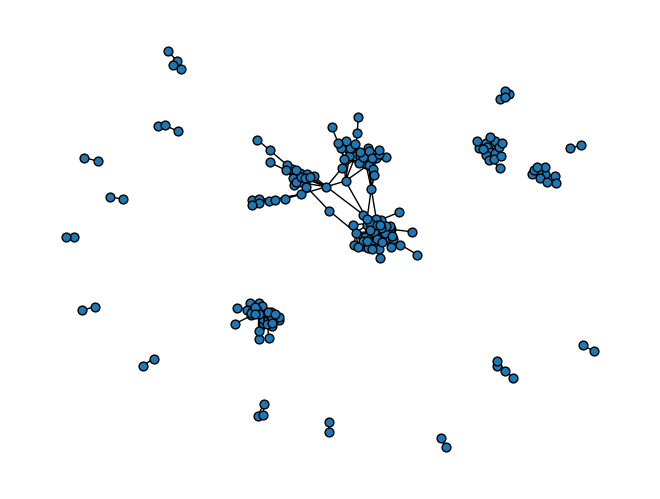

In [3]:
nx.draw(
    G = G_bt_snapshot, 
    node_size = 40, 
    edgecolors = 'black'
)

There are this many connected components:

In [4]:
nx.number_connected_components(G_bt_snapshot)

18

The histogram of component sizes is:

In [5]:
component_sizes = [len(c) for c in nx.connected_components(G_bt_snapshot)]
component_sizes

[35, 10, 110, 2, 2, 4, 16, 2, 4, 2, 3, 2, 3, 2, 4, 2, 2, 2]

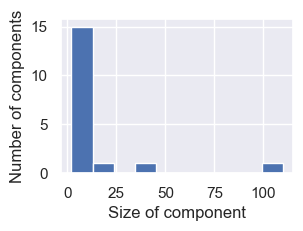

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

plt.figure(figsize=[3, 2])
plt.hist(component_sizes)
plt.xlabel('Size of component')
plt.ylabel('Number of components')
plt.show()

Before we move on, we must introduce a very common network measure. The **density** of a group of nodes is the number of edges $m$ divided by the number of possible edges $\frac{1}{2}n(n-1)$ where $n$ is the number of nodes (the definition is for an undirected graph). Use the [`density()`](https://networkx.org/documentation/networkx-2.8.4/reference/generated/networkx.classes.function.density.html) function:

In [7]:
print('Density of the face-to-face network:', nx.density(G_bt_snapshot))
print('Density of just its largest component:', nx.density(G_bt_snapshot_lcc))

Density of the face-to-face network: 0.029032409361662213
Density of just its largest component: 0.061384487072560466


### D2.1.1. Core/periphery structure

The definition of connected components includes the possibility that parts of the component my only be connected by one node. Consequently, the component would fall apart if those nodes were removed from the network. Such nodes are called **cutpoints** or articulation points. A cutpoint is a node whose removal will increase the number of connected components. These points can be found with the [`articulation_points()`](https://networkx.org/documentation/networkx-2.8.4/reference/algorithms/generated/networkx.algorithms.components.articulation_points.html) function which is only implemented for undirected graphs:

In [8]:
cutpoints = list(nx.articulation_points(G_bt_snapshot_lcc))
cutpoints

[378, 559, 568, 300, 600, 524, 571, 550, 158, 218, 196, 166, 272]

Cutpoints are marked red in the following plot. Note how Python allows to simply subtract one set from another one to arrive at the exclusive set (line 4):

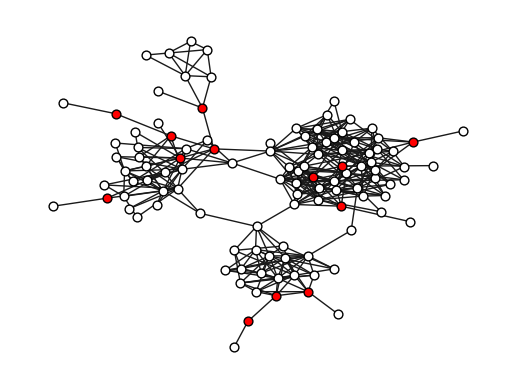

In [9]:
nx.draw_networkx_nodes(
    G = G_bt_snapshot_lcc, 
    pos = nx.get_node_attributes(G=G_bt_snapshot_lcc, name='pos'), 
    nodelist = G_bt_snapshot_lcc.nodes() - cutpoints, 
    node_size = 40, 
    node_color = 'white', 
    edgecolors = 'black'
)
nx.draw_networkx_nodes(
    G = G_bt_snapshot_lcc, 
    pos = nx.get_node_attributes(G=G_bt_snapshot_lcc, name='pos'), 
    nodelist = cutpoints, 
    node_size = 40, 
    node_color = 'red', 
    edgecolors = 'black'
)
nx.draw_networkx_edges(
    G = G_bt_snapshot_lcc, 
    pos = nx.get_node_attributes(G=G_bt_snapshot_lcc, name='pos')
)
plt.box(False)

If cutpoints are removed from the network, it falls apart into multiple networks. What properties do those new networks have? Think about it for a while. The new networks will not disintegrate when just one node is removed, they require the removal of at least two nodes to fall apart. As a result, each node will have a degree of at least 2 because, otherwise, it would be connected to the rest of the network via a cutpoint. Networks with these properties are called biconnected components or simply **bicomponents**. Bicomponents are maximal subgraphs that cannot be disconnected by the removal of any single node. NetworkX provides the [`biconnected_components()`](https://networkx.org/documentation/networkx-2.8.4/reference/algorithms/generated/networkx.algorithms.components.biconnected_components.html) function to obtain the nodelists and the [`biconnected_component_edges()`](https://networkx.org/documentation/networkx-2.8.4/reference/algorithms/generated/networkx.algorithms.components.biconnected_component_edges.html) function to obtain the edgelists of all bicomponents. Both functions are only implemented for undirected graphs. Since cutpoints can, but edges cannot, belong to multiple bicomponents, we decide to work with the edgelists. We only keep bicomponents of two or more edges:

In [10]:
bicomponents = [c for c in sorted(nx.biconnected_component_edges(G_bt_snapshot_lcc), key=len, reverse=True) if len(c) >= 2]

In the following plot we color the different bicomponents via their edges (lines 8-14):

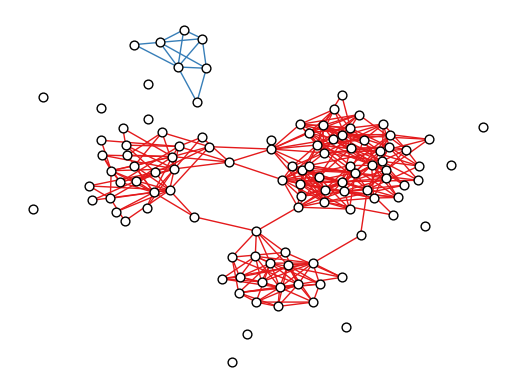

In [11]:
nx.draw_networkx_nodes(
    G = G_bt_snapshot_lcc, 
    pos = nx.get_node_attributes(G=G_bt_snapshot_lcc, name='pos'), 
    node_size = 40, 
    node_color = 'white', 
    edgecolors = 'black'
)
for c in range(len(bicomponents)):
    nx.draw_networkx_edges(
        G = G_bt_snapshot_lcc, 
        pos = nx.get_node_attributes(G=G_bt_snapshot_lcc, name='pos'), 
        edgelist = bicomponents[c], 
        edge_color = plt.cm.Set1(c)
    )
plt.box(False)

Do you see how we can separate network cores from the periphery with this principle? We just need to generalize from biconnected components to $k$-connected components or simply **$k$-components**. $k$-components are maximal subgraphs that cannot be disconnected by the removal of any $k$ nodes. Bicomponents are the special case for $k=2$. The method may identify multiple overlapping $k$-components with similar connectivity $k$. As we increase $k$ in structural cohesion analysis, we remove the periphery and only the cores remain (McLevey, 2022, ch. 14.5). The [`k_components()`](https://networkx.org/documentation/networkx-2.8.4/reference/algorithms/generated/networkx.algorithms.connectivity.kcomponents.k_components.html) function is implemented for undirected graphs and returns a dictionary with the nodelists of all $k$-components for each $k$:

In [12]:
kcomp = nx.k_components(G_bt_snapshot_lcc)

By increasing $k$ with a slider, we can playfully see how $k$-connected components with large $k$ are embedded into $k$-components with smaller $k$:

In [13]:
import ipywidgets

def filter_kcomp(kcomp):
    def draw_kcomp(k):
        sets_nodes_kcomp = [c for c in sorted(kcomp[k], key=len, reverse=True)]
        
        nx.draw_networkx_nodes(
            G = G_bt_snapshot_lcc, 
            pos = nx.get_node_attributes(G=G_bt_snapshot_lcc, name='pos'), 
            node_size = 40, 
            node_color = 'white', 
            edgecolors = 'black'
        )
        for c in range(len(sets_nodes_kcomp)):
            nx.draw_networkx_edges(
                G = G_bt_snapshot_lcc, 
                pos = nx.get_node_attributes(G=G_bt_snapshot_lcc, name='pos'), 
                edgelist = nx.subgraph(G_bt_snapshot_lcc, nbunch=sets_nodes_kcomp[c]).edges, 
                edge_color = plt.cm.Set1(c)
            )
        plt.box(False)
    
    ipywidgets.interact(
        draw_kcomp, 
        k = ipywidgets.IntSlider(value=3, min=min(kcomp.keys()), max=max(kcomp.keys()), step=1)
    )

filter_kcomp(kcomp=kcomp)

interactive(children=(IntSlider(value=3, description='k', max=6, min=1), Output()), _dom_classes=('widget-inte…

If the network was a land mass, then increasing $k$ is like letting the water level rise. At first, the network periphery will be under water. Then, with rising water level, islands form. These islands are the locally dense and large-degree network cores, and the last island to submerge is the strongest core.

It is possible to extract the maximum $k$ number per node, a micro-level **nestedness** score that quantifies the extent to which a node is embedded in a core. We need a custom function for this:

In [14]:
def kcomp_number(G, kcomp):
    '''
    Returns the maximum k-component number for each vertex.
    
    Parameters:
        G : Graph or MultiGraph
            Graph that defines the set of nodes.
        kcomp : Dictionary
            Keys must be k and values must be lists of node 
            sets that are k-connected.
    
    Returns:
        A dictionary.
    '''
    d = {node: 1 for node in G.nodes()}
    for k in range(2, len(kcomp) + 1):
        for node in [node for set_kcomp in kcomp[k] for node in set_kcomp]:
            d[node] = k
    return d

It is always a good idea to store node-level information in the nodelist:

In [15]:
nodelist_bt_snapshot_lcc.loc[:, 'nestedness'] = kcomp_number(G=G_bt_snapshot_lcc, kcomp=kcomp).values()
nodelist_bt_snapshot_lcc.head()

,x,y,nestedness
272,-0.316820,0.261284,3
677,0.460070,0.077096,5
97,0.369810,0.182470,6
416,0.094921,-0.572258,5
100,0.039206,-0.589575,5


We can use this dataframe to create a plot that very much resonates with the island image of core/periphery structure. Seaborn's [`kdeplot()`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) function visualizes the distribution of data points using the spatial node coordinates obtained from graph layouting (in the beginning of the session). It elevates regions with a large density of nodes. Since the layout algorithm we have used pulls nodes in structurally cohesive subgraphs together, the plot is already a fair representation of the core/periphery structure. Using the nestedness variable as `weights` improves the result:

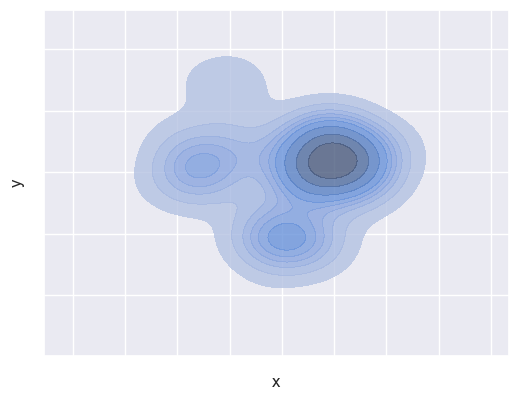

In [16]:
plt.figure(figsize=[6, 4.5])
ax = sns.kdeplot(data=nodelist_bt_snapshot_lcc, x='x', y='y', weights='nestedness', alpha=.8, fill=True)
ax.set(xticklabels=[], yticklabels=[])
plt.show()

If you have an attitude variable that is a measure of emotional attachment to the rules that govern the network, then you can also use the nestedness score to perform an analysis of social cohesion. The nestedness score is the same that Moody & White (2003) use in their study on school attachment.

Finally, we can put a number in how connected the network we have studied is. The **average node connectivity** is the average local node connectivity over all pairs of nodes where the local node connectivity is the minimum number of nodes that must be removed to disconnect a pair of nodes. The [`average_node_connectivity()`](https://networkx.org/documentation/networkx-2.8.4/reference/algorithms/generated/networkx.algorithms.connectivity.connectivity.average_node_connectivity.html) function can take long to compute when the network is large:

In [17]:
nx.average_node_connectivity(G_bt_snapshot_lcc)

2.8623853211009176

On average, about three nodes must be removed to disconnect a pair of nodes.

<div class='alert alert-block alert-warning'>
<b>Additional resources</b>

Core/periphery analysis with the $k$-component algorithm only works for small networks. When networks get large, you can use the $k$-core [algorithm](https://networkx.org/documentation/networkx-2.8.4/reference/algorithms/core.html) that detects cores by recursively pruning nodes with degrees less than $k$ (a generalization of the procedure that removes cutpoints). For a given $k$, a $k$-component is always nested inside a $k$-core (Menczer et al., 2020, ch. 3.6).
</div>

### D2.1.2. Segregation

$k$-components are, by definition, subgraphs in which all nodes have at least a degree of $k$. The larger $k$, the more a $k$-component connects nodes with similar degrees. But how about the whole network? Do birds of a feather flock together? For example, do nodes with small degrees tend to connect to other nodes with small degrees? And do nodes with large degrees tend to stay among themselves? If this is the case, then there is segregation. We can provide a statistical answer using **assortativity analysis** where [assortativity](https://en.wikipedia.org/wiki/Assortativity) is a preference of nodes to be connected to others that are similar in some way (Menczer *et al.*, 2020, ch. 2.1).

The [`degree_assortativity_coefficient()`](https://networkx.org/documentation/networkx-2.8.4/reference/algorithms/generated/networkx.algorithms.assortativity.degree_assortativity_coefficient.html) measures the similarity of connections in the graph with respect to node degree. The measure is simply the correlation coefficient, which means, it ranges from -1 (when large-degree nodes connect to small-degree nodes) to 1 (when large-degree nodes connect to large-degree nodes and small-degree nodes connect to small-degree nodes). We switch to the Facebook friendship network which, as we have seen in [Session C1](../c_data_preprocessing_methods/1_network_construction_and_visualization.ipynb), does not exhibit community structure:

In [18]:
nx.degree_assortativity_coefficient(G_fb)

0.18241178995485915

So there is degree correlation.

Degree is a numerical variable. We can also perform assortativity analysis with categorical variables. In most cases, we know the sex of students. It is coded 0: male, 1: female, 2: unknown. It is distributed like this (*i.e.*, women are a minority):

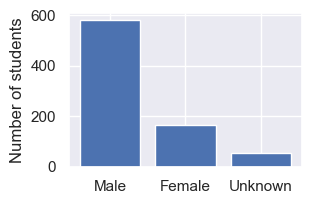

In [19]:
from collections import Counter

counts = Counter(list(nx.get_node_attributes(G=G_fb, name='sex').values())).values()

plt.figure(figsize=[3, 2])
plt.bar(['Male', 'Female', 'Unknown'], counts)
plt.ylabel('Number of students')
plt.show()

This time, we need the [`attribute_assortativity_coefficient()`](https://networkx.org/documentation/networkx-2.8.4/reference/algorithms/generated/networkx.algorithms.assortativity.attribute_assortativity_coefficient.html) function:

In [20]:
nx.attribute_assortativity_coefficient(G=G_fb, attribute='sex')

0.10500672990329468

The coefficient means that there is some amount of sex segregation. But we need to take this result with a grain of salt. Karimi *et al.* (2018) have shown that the assortativity measure is insensitive to asymmetry in group behavior. Maybe it is only the men that drive sex segregation? After all, women are a minority. The [`attribute_mixing_matrix()`](https://networkx.org/documentation/networkx-2.8.4/reference/algorithms/generated/networkx.algorithms.assortativity.attribute_mixing_matrix.html) gives the number of edges inside and between nodes from the given categories:

In [21]:
nx.attribute_mixing_matrix(G=G_fb, attribute='sex', normalized=False)

array([[6370., 2095.,  375.],
       [2095., 1148.,  138.],
       [ 375.,  138.,  102.]])

As expected, men (the majority in the first row and column) have more edges that women. What these absolute numbers do not tell us is if the numbers of edges are more or less than expected by chance. To obtain this information, we write an `attribute_density_matrix()` function that divides the values in the attribute mixing matrix by the possible number of edges inside and between categories. In other words, it provides attribute-based densities:

In [22]:
import numpy as np

In [23]:
def attribute_density_matrix(G, attribute):
    '''
    Returns the densities inside and between attribute-based 
    node categories.
    
    Parameters:
        G : NetworkX graph
            Graph, DiGraph, MultiGraph, or MultiDiGraph.
        attribute : Dictionary
            Keys must be nodes and values must be integers 
            coding the categories.
    
    Returns:
        Array containing densities.
    '''
    l = [data[attribute] for v, data in G.nodes(data=True)]
    counts = list(Counter(l).values())
    a = np.empty(shape=(len(counts), len(counts)))
    for i in range(len(counts)):
        for j in range(len(counts)):
            if i == j:
                a[i, j] = counts[i] * (counts[j] - 1)
            else:
                a[i, j] = counts[i] * counts[j]
    return nx.attribute_mixing_matrix(G=G, attribute=attribute, normalized=False) / a

The local densities are:

In [24]:
p_fb_sex = attribute_density_matrix(G=G_fb, attribute='sex').round(4)
p_fb_sex

array([[0.0189, 0.0217, 0.0122],
       [0.0217, 0.0419, 0.0157],
       [0.0122, 0.0157, 0.037 ]])

Put these local densities into perspective by dividing them by the overall network density:

In [25]:
p_fb = nx.density(G_fb)
p_fb

0.020081351689612014

In [26]:
(p_fb_sex / p_fb).round(2)

array([[0.94, 1.08, 0.61],
       [1.08, 2.09, 0.78],
       [0.61, 0.78, 1.84]])

The final matrix tells us that women have two times more connections among themselves than expected by chance. Men are slightly less connected among themselves than expected. In other words, sex segregation in the Facebook friendship network is due to the women's way of connecting to others.

### D2.2. Separation

The Small-World experiment of the 60s has resulted in the "six degrees of separation"-hypothesis that an average pair of individuals is connected by a path of length six or by five middlemen (Menczer *et al.*, 2020, ch. 2.7). Obviously, there is something in the social fabric that makes individuals close relationally even when they are far away geographically. Watts & Strogatz (1998) have thought about what characteristics a network with a Small-World structure should have. They proposed that it should combine two properties. First, and obviously, the network should be globally connected at short distance. This can be measured via the **average shortest path length** $L$ of a network. But our social world is certainly also locally dense and consists of closed groups. In [Session C1](../c_data_preprocessing_methods/1_network_construction_and_visualization.ipynb), you have learned about the clustering coefficient as a micro-level measurement of closure (and about the concept of paths). Accordingly, Watts & Strogatz propose the **average clustering coefficient** $C$ as the second macro-level measure of Small-World Structure.

Let us quantify the smallworldliness of the Facebook friendship network, the communication network of text messages & phone calls, and the face-to-face interaction network. To do so, we compute the [`average_clustering()`](https://networkx.org/documentation/networkx-2.8.4/reference/algorithms/generated/networkx.algorithms.cluster.average_clustering.html) and [`average_shortest_path_length()`](https://networkx.org/documentation/networkx-2.8.4/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.average_shortest_path_length.html) scores as well as the very basic number of nodes, number of edges, and density:

In [27]:
# number of nodes
n_fb = G_fb.number_of_nodes()
n_communication = G_communication.number_of_nodes()
n_bt_snapshot_lcc = G_bt_snapshot_lcc.number_of_nodes()

# number of edges
m_fb = G_fb.number_of_edges()
m_communication = G_communication.number_of_edges()
m_bt_snapshot_lcc = G_bt_snapshot_lcc.number_of_edges()

# density
p_fb = nx.density(G_fb)
p_communication = nx.density(G_communication)
p_bt_snapshot_lcc = nx.density(G_bt_snapshot_lcc)

# average clustering coefficient
c_fb = nx.average_clustering(G_fb)
c_communication = nx.average_clustering(G_communication)
c_bt_snapshot_lcc = nx.average_clustering(G_bt_snapshot_lcc)

# average shortest path length
l_fb = nx.average_shortest_path_length(G_fb)
l_communication = nx.average_shortest_path_length(G_communication)
l_bt_snapshot_lcc = nx.average_shortest_path_length(G_bt_snapshot_lcc)

In [28]:
stats = pd.DataFrame(index=['Facebook friendship', 'Text messages & phone calls', 'Face-to-face interaction'])
stats['n'] = [n_fb, n_communication, n_bt_snapshot_lcc]
stats['m'] = [m_fb, m_communication, m_bt_snapshot_lcc]
stats['p'] = [p_fb, p_communication, p_bt_snapshot_lcc]
stats['c'] = [c_fb, c_communication, c_bt_snapshot_lcc]
stats['l'] = [l_fb, l_communication, l_bt_snapshot_lcc]
stats

,n,m,p,c,l
Facebook friendship,800,6418,0.020081,0.315351,2.980025
Text messages & phone calls,194,215,0.011484,0.100908,9.990812
Face-to-face interaction,110,368,0.061384,0.405040,3.989324


The table tells us, for example, that there are three degrees of separation in the large friendship network ($n=800$) or that the dense interaction network ($p\approx0.06$) is most closed in terms of clustering. But how comparable are those scores? How are they related to the size of the network? Watts & Strogatz (1998) propose to compare the empirical networks to random counterparts that are comparable in terms of $n$ and $p$. These **random networks** are called [Erdős–Rényi graphs](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model). They are purely random in the sense that each possible edge exists with probability $p$ (Menczer *et al.*, 2020, ch. 5.1). A random counterpart graph can be generated with the [`erdos_renyi_graph()`](https://networkx.org/documentation/networkx-2.8.4/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html) function by passing the number of nodes and density to parameters `n` and `p`:

In [29]:
G_fb_random = nx.erdos_renyi_graph(n=n_fb, p=p_fb, seed=42)
G_communication_random = nx.erdos_renyi_graph(n=n_communication, p=p_communication, seed=42)
G_bt_snapshot_lcc_random = nx.erdos_renyi_graph(n=n_bt_snapshot_lcc, p=p_bt_snapshot_lcc, seed=42)

Plot the empirical networks and their random counterparts:

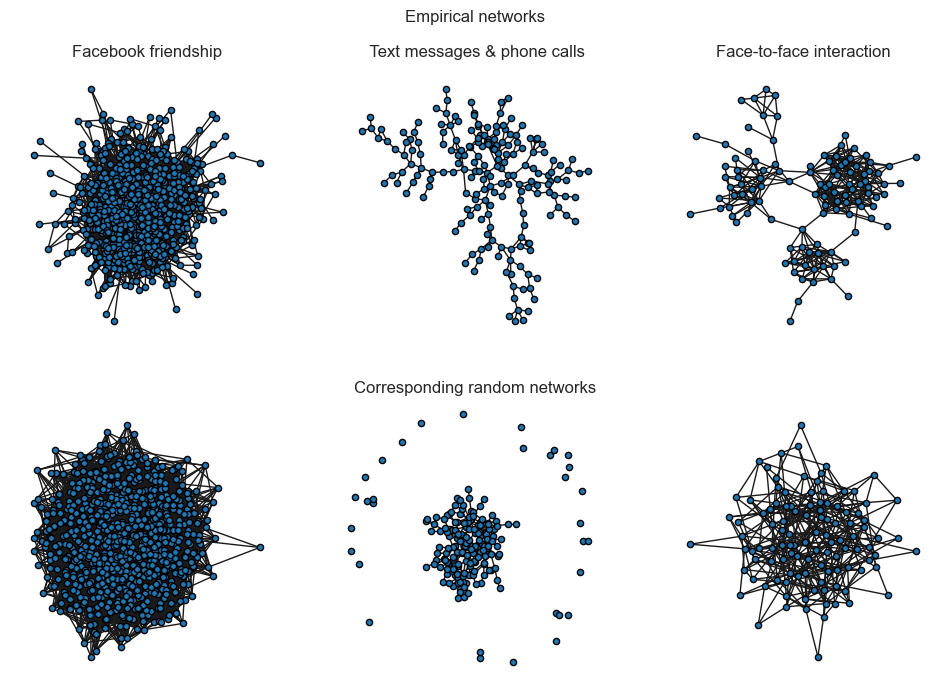

In [30]:
empirical = [G_fb, G_communication, G_bt_snapshot_lcc]
titles_empirical = ['Facebook friendship', 'Empirical networks\n\n Text messages & phone calls', 'Face-to-face interaction']
random = [G_fb_random, G_communication_random, G_bt_snapshot_lcc_random]
titles_random = ['', 'Corresponding random networks', '']

fig, axs = plt.subplots(2, 3, figsize=(12, 8))
for i in range(3):
    axs[0, i].set_title(titles_empirical[i])
    nx.draw(
        G = empirical[i], 
        pos = nx.get_node_attributes(G=empirical[i], name='pos'), 
        ax = axs[0, i], 
        node_size = 20, 
        edgecolors = 'black'
    )
for i in range(3):
    axs[1, i].set_title(titles_random[i])
    nx.draw(
        G = random[i], 
        ax = axs[1, i], 
        node_size = 20, 
        edgecolors = 'black'
    )

Though the random networks do not look much like the empirical networks (except for the friendship network, maybe), we can meaningfully use them to put the $L$ and $C$ scores into perspective. Since random networks do not exhibit patterns, they allow us to put a number into how significant an empirical pattern is. Erdős–Rényi graphs have small average shortest path lengths and could explain the six degrees of separation on the large scale. However, since network closure at low density is a pattern, Erdős–Rényi graphs hardly have any triads at low density.

The average clustering coefficient of a random graph is simply its density:

In [31]:
stats['c_random'] = stats['p']

The average shortest path length of a random graph can be obtained [analytically](https://math.stackexchange.com/questions/501216/what-is-the-equation-for-the-average-path-length-in-a-random-graph) with this function:

In [32]:
def average_shortest_path_length_random(n, m):
    return (np.log(n) - .57722) / np.log(2 * m / n) + .5

In [33]:
l_fb_random = average_shortest_path_length_random(n=n_fb, m=m_fb)
l_communication_random = average_shortest_path_length_random(n=n_communication, m=m_communication)
l_bt_random = average_shortest_path_length_random(n=n_bt_snapshot_lcc, m=m_bt_snapshot_lcc)

stats['l_random'] = [l_fb_random, l_communication_random, l_bt_random]

The final normalization step is to divide the empirical scores by the corresponding random scores (lines 1-2). In addition, we quantify the **smallworldliness** $Q$ of the networks, the extent to which they exhibit Small-World structure (line 3). $Q$ is the quotient of the normalized scores. It increases the more a network's average clustering coefficient $C$ is larger than in its random counterpart, and it decreases the more its characteristic path length $L$ is closer to that of its random counterpart:

In [34]:
stats['c_norm'] = stats['c'] / stats['c_random']
stats['l_norm'] = stats['l'] / stats['l_random']
stats['q'] = stats['c_norm'] / stats['l_norm']
stats[['p', 'c_random']] = stats[['p', 'c_random']].round(5)
stats[['c', 'l', 'l_random', 'c_norm', 'l_norm', 'q']] = stats[['c', 'l', 'l_random', 'c_norm', 'l_norm', 'q']].round(2)
stats

,n,m,p,c,l,c_random,l_random,c_norm,l_norm,q
Facebook friendship,800,6418,0.02008,0.32,2.98,0.02008,2.70,15.70,1.10,14.23
Text messages & phone calls,194,215,0.01148,0.10,9.99,0.01148,6.39,8.79,1.56,5.62
Face-to-face interaction,110,368,0.06138,0.41,3.99,0.06138,2.67,6.60,1.49,4.42


The normalized scores tell us that all empirical networks have characteristic path lengths which are comparable to those of random graphs and that clustering is from seven to 16 times larger than expected by chance. The friendship network is most strongly a network with Small-World structure, and the interaction network least so.

### D2.3. Inequality

Inequality in networks can be studied by taking the distributions of node-level quantities like centrality indeces, measures of closure and brokerage, or the embeddedness score derived above and quantifying their unevenness. One such measure is the **entropy** of a node-level quantity: the average level of "information", "surprise", or "uncertainty" inherent to the quantities's possible outcomes (see the Wikipedia [page](https://en.wikipedia.org/wiki/Entropy_(information_theory)) for a definition). The following `inequality()` function divides the observed entropy of a variable by the maximum possible entropy to arrive at a normalized score that is 0 when all quantities are similar (*i.e.*, inequality is minimal) and 1 when all scores but one are 0 (*i.e.*, inequality is maximal):

In [35]:
from scipy.stats import entropy

def inequality(l):
    return 1 - entropy(pk=l) / np.log(len(l))

For example, the inequality of nestedness in the face-to-face interaction network is:

In [36]:
inequality(nodelist_bt_snapshot_lcc['nestedness'])

0.021589290811572903

The degree inequalities of our three networks are:

In [37]:
nodelist_fb = pd.DataFrame(index=G_fb.nodes())
nodelist_fb['degree'] = [k for v, k in G_fb.degree()]

print('Facebook friendship:', inequality(nodelist_fb['degree']))
print('Text messages & phone calls:', inequality([k for v, k in G_communication.degree()]))
print('Face-to-face interaction:', inequality([k for v, k in G_bt_snapshot_lcc.degree()]))

Facebook friendship: 0.04286716024454429
Text messages & phone calls: 0.030318457565924217
Face-to-face interaction: 0.039414604647010854


The study of network inequality gained a lot of momentum after the discovery of Barabási & Albert (1999) that many complex networks are scale-free. In a **scale-free network**, the probability $P(k)$ that a node has degree $k$ has the form of a power law

$P(k)\propto k^{-\alpha}$.

Power laws show as straight lines on double-logarithmic axes where the exponent $\alpha$ is the slope of the line and can be interpreted as a measure of inequality. The smaller the exponent, the larger the inequality. The unique statistical property of [power laws](https://en.wikipedia.org/wiki/Power_law) with $\alpha\leq3$ is that their variance does not converge to a particular value as data is accumulated – the variance just keeps on increasing. For such networks, we cannot say that they have a characteristic degree because we cannot describe the shape of the degree distribution in terms of mean and variance. Hence, they are called scale-free (Menczer *et al.*, 2020, ch. 3.2).

In [Session A3: Scientific computing and data visualization](), we have encountered the [powerlaw](https://pypi.org/project/powerlaw/) package to fit power laws and other functions to data. See that session for more details of power-law testing. Here, we apply the fitting routine to characterize the degree distribution of the friendship network. Set `xmin=1` to fit functions to the whole data and prevent the `Fit()` function from trying to identify a data regime at and above a lower cutoff where the power law is a good fit:

In [38]:
import powerlaw

In [39]:
fit_degree_fb = powerlaw.Fit(data=nodelist_fb['degree'], xmin=1)

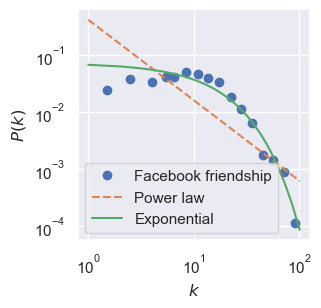

In [40]:
plt.figure(figsize=[3, 3])
fig = fit_degree_fb.plot_pdf(marker='o', linestyle='', label='Facebook friendship')
fit_degree_fb.power_law.plot_pdf(linestyle='--', label='Power law')
fit_degree_fb.exponential.plot_pdf(linestyle='-', label='Exponential')
plt.legend()
plt.xlabel('$k$')
plt.ylabel('$P(k)$')
plt.show()

We see that the power law (orange straight line) is not a good fit for the data at all. The exponential function is a much better fit. The exponential function describes the tails of a Gaussian distribution, which means, extremely large quantities are extremely improbable and inequality is small. We conclude that the friendship network is not scale-free. Instead, students have a characteristic number of $16\pm13$ friends:

In [41]:
k_fb = nodelist_fb['degree'].mean()

print('Mean:', k_fb)
print('Standard deviation:', nodelist_fb['degree'].std())

Mean: 16.045
Standard deviation: 13.391775444725504


We can use the **skewness** of the distribution, a [measure](https://en.wikipedia.org/wiki/Skewness) for its asymmetry, to quantify inequality. The skewness is about 2, just as expected for an exponential distribution:

In [42]:
from scipy.stats import skew

skew_fb = skew(nodelist_fb['degree'])
print('Skewness:', skew_fb)

Skewness: 2.1321254042254534


### D2.4. Network modeling

In the previous subsessions, we have seen that empirical social networks can have Small-World structure. And despite the Facebook friendship network of students not being scale-free, large social networks do exhibit large inequality in terms of node degree. For example, the largest degree in the whole Facebook friendship network of active users in 2011 is about 5000 (Ugander *et al.*, 2011). Where do short paths, clustering, and degree inequality come from? Can we explain the macro-level patterns we have identified as an outcome of micro-level behavior?

A way to study the origin of network characteristics is by way of a **model**, "a simplified description, especially a mathematical one, of a system or process, to assist calculations and predictions" (Menczer *et al.*, 2022, p. 120; ch. 5). In NS, the boundary between macro-level network description and network modeling often blur. As we have seen in the separation subsession, the measurement of Small-World characteristics already involves comparisons with random network models. In this subsession, we will get to know three network models that differ very much in terms of if and how the processes depicted in the micro-macro diagram of *figure 2* operate.

#### Watts-Strogatz (WS) model

The first model was proposed by Watts & Strogatz (1998) to generate networks with Small-World structure. As we have seen, Small-World structure combines two network characteristics: the small average shortest path length of random networks and the large clustering coefficient that regular networks have. Watts & Strogatz thought, what if we take a **regular network** with perfect order and symmetry and rewire each edge with probability $p$ such that the graph is completely ordered for $p=0$ (shown in the left panel below) and completely random for $p=1$ (right panel)? What happens in between? It turned out that for values of $p$ somewhere between $0.01$ and $0.1$ (middle panel) the resulting networks have Small-World structure.

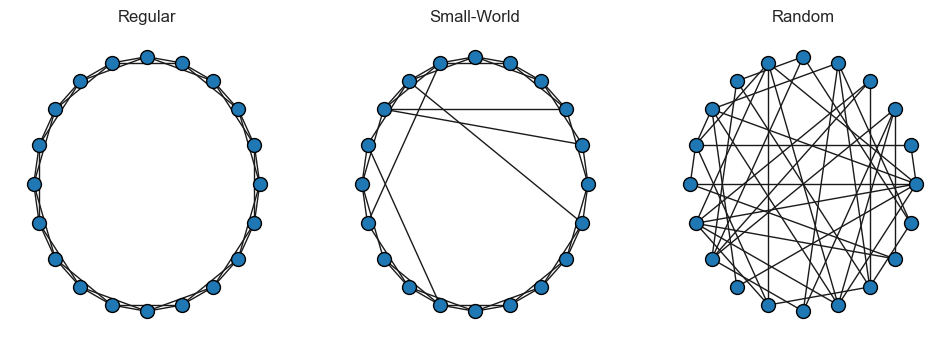

In [43]:
networks = [nx.watts_strogatz_graph(n=20, k=4, p=0.), nx.watts_strogatz_graph(n=20, k=4, p=0.05, seed=42), nx.watts_strogatz_graph(n=20, k=4, p=1.)]
titles = ['Regular', 'Small-World', 'Random']

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for i in range(3):
    axs[i].set_title(titles[i])
    nx.draw(
        G = networks[i], 
        pos = nx.circular_layout(networks[i]), 
        ax = axs[i], 
        node_size = 100, 
        edgecolors = 'black'
    )

If we know the number of nodes $n$ and average degree $\langle k\rangle$ of an empirical network, then we can construct an regular graph with these two parameters and randomize its edges until the network model has the same (or similar) characteristic path length and clustering as the empirical network.

We can build such a network with the [`watts_strogatz_graph()`](https://networkx.org/documentation/networkx-2.8.4/reference/generated/networkx.generators.random_graphs.watts_strogatz_graph.html) generator. In this algorithm, the ordered graph has a ring topology where each node is connected to its $k\geq4$ neighbors ($k/2$ on the left and $k/2$ on the right). We will model the Facebook friendship network. From our previous analyses we know that the number of nodes $n=800$ and the average degree $\langle k\rangle\approx16$. For the purpose of demonstration, we start with $p=0$:

In [44]:
G_ring = nx.watts_strogatz_graph(n=800, k=16, p=0.)

The two Small-World measures are our criteria for the goodness of the model. The clustering coefficient of the model is still too large:

In [45]:
print('Average clustering coefficient (Facebook friendship):', c_fb)
print('Average clustering coefficient (model):', nx.average_clustering(G_ring))

Average clustering coefficient (Facebook friendship): 0.3153509697401216
Average clustering coefficient (model): 0.6999999999999966


The characteristic path length is way too large since we have not randomized any edges:

In [46]:
print('Average shortest path length (Facebook friendship):', l_fb)
print('Average shortest path length (model):', nx.average_shortest_path_length(G_ring))

Average shortest path length (Facebook friendship): 2.9800250312891112
Average shortest path length (model): 25.469336670838548


To construct a realistic network model, we must identify the right value of $p$. We do so by increasing it step by step from $p=0$ (line 1) while the average clustering coefficient `c_ws` of the model is larger than the average clustering coefficient `c_fb` of the friendship network (lines 2-6):

In [47]:
p = 0.
c_ws = 1
while c_ws > c_fb:
    G_ws = nx.watts_strogatz_graph(n=800, k=16, p=p, seed=42)
    c_ws = nx.average_clustering(G_ws)
    p += .01
print('The probability of rewiring each edge must be %.2f.' %(p-2*.01))

G_ws = nx.watts_strogatz_graph(n=800, k=16, p=p-2*.01, seed=42)
c_ws = nx.average_clustering(G_ws)
l_ws = nx.average_shortest_path_length(G_ws)

The probability of rewiring each edge must be 0.24.


Clustering of the model is now close to the empirical value:

In [48]:
print('Average clustering coefficient (Facebook friendship):', c_fb)
print('Average clustering coefficient (model):', c_ws)

Average clustering coefficient (Facebook friendship): 0.3153509697401216
Average clustering coefficient (model): 0.32415717212998596


And so is the characteristic path length:

In [49]:
print('Average shortest path length (Facebook friendship):', l_fb)
print('Average shortest path length (model):', l_ws)

Average shortest path length (Facebook friendship): 2.9800250312891112
Average shortest path length (model): 3.0080913642052565


In sum, we have managed to construct a network with a topology that is very similar to that of the friendship network in two aspects. Such synthetic Small-World networks are commonly used for benchmarking purposes, for example, to study the effect of network structure on processes like diffusion (Watts & Strogatz, 1998).

However, we would have a very hard time to argue that randomizing their social relations is something that actors do and that Small-World structure results from this process in real social life. The WS model is a **topological model**, not an analytical one. The topology is not the result of self-organization but of network modeling for analysis. It is something we do as network analyst, nothing the nodes in the network do.

#### Barabási-Albert (BA) model 

The second model is an **analytical model**, which means, a model that equips network nodes with certain rules of behavior that are sociologically meaningful and generate a particular pattern. In analytical models, patterns are emergent, which means, the models implement a micro-macro feedback process of *figure 2* where the acting network nodes are influenced by the macro-level outcomes of their collective behavior (Keuschnigg *et al.*, 2018).

Barabási & Albert (1999) have proposed such a model that seeks to explain scale-free degree distributions of complex networks. The model combines network growth (*i.e.*, the addition of new nodes over time) with the behavioral rule of **preferential attachment**. Preferential attachment is a network implementation of the Matthew Effect, and it states that new nodes attach to existing nodes proportional to the existing nodes' degrees. Nodes with large degrees will acquire more edges than nodes with small degrees, and the result of this process is a power-law degree distribution with an exponent of $\alpha=3$. The process is a feedback loop because the degree distribution both self-organizes from the bottom up to a very skewed state and influences node attachment from the top down.

The [`barabasi_albert_graph()`](https://networkx.org/documentation/networkx-2.8.4/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html) generator grows a scale-free network and requires two parameters as input. We are again modeling the Facebook friendship network, so the number of nodes `n` of the final graph must be 800. The number of edges to attach from a new node to existing nodes `m` is unknown and must be estimated in order to arrive at a synthetic network whose average degree `k_ba` is similar to the average degree `k_fb` of the friendship network. We estimate `m` by increasing it step by step from `m = 1` (line 1) while `k_ba` is smaller than `k_fb` (lines 2-6):

In [50]:
m = 1
k_ba = 0
while k_ba < k_fb:
    G_ba = nx.barabasi_albert_graph(n=800, m=m)
    k_ba = np.mean([k for v, k in G_ba.degree()])
    m += 1
print('The number of edges to attach from a new node to existing nodes must be %.0f.' %(m-2*1))

G_ba = nx.barabasi_albert_graph(n=800, m=m-2*1)
degree_ba = [k for v, k in G_ba.degree()]
k_ba = np.mean(degree_ba)

The number of edges to attach from a new node to existing nodes must be 8.


The average degree of the model is now close to the empirical value:

In [51]:
print('Average degree (Facebook friendship):', k_fb)
print('Average degree (model):', k_ba)

Average degree (Facebook friendship): 16.045
Average degree (model): 15.84


To compare the degree distributions of the empirical and model networks, we prepare a `Fit` object. This time we let the algorithm identify the lower cutoff `xmin`set the lower cutoff `xmin`:

In [52]:
fit_degree_ba = powerlaw.Fit(data=degree_ba, xmin=None)

Calculating best minimal value for power law fit


As expected, the synthetic network is scale-free with an exponent of approximately 3:

In [53]:
fit_degree_ba.alpha

3.000506463441961

The degree distributions are:

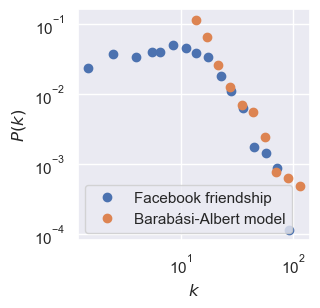

In [54]:
plt.figure(figsize=[3, 3])
fig = fit_degree_fb.plot_pdf(marker='o', linestyle='', label='Facebook friendship')
fit_degree_ba.plot_pdf(marker='o', linestyle='', label='Barabási-Albert model')
plt.legend()
plt.xlabel('$k$')
plt.ylabel('$P(k)$')
plt.show()

As we can see, the BA model is not a good explanation of the processes that generated the Facebook friendship network. We did not expect this since the BA model generates scale-free networks but the empirical network is not scale-free. The purpose of this exercise was not to build a realistic model but to introduce the BA model in general.

<div class='alert alert-block alert-warning'>
<b>Additional resources</b>

NetworkX also provides the [`extended_barabasi_albert_graph()`](https://networkx.org/documentation/networkx-2.8.4/reference/generated/networkx.generators.random_graphs.extended_barabasi_albert_graph.html) generator. It allows for modeling local events like adding edges to existing nodes or rewiring existing edges. This model can result in more realistic, exponential degree distributions (Albert \& Barabási, 2000), but this comes at the cost of it becoming harder to argue that the new options resemble realistic social behavior. Further variants of the BA model are discussed by Menczer *et al.* (2020, ch. 5.5).
</div>

#### Stochastic Blockmodel (SBM)

The third model is, again, a topological model. The [Stochastic Blockmodel](https://en.wikipedia.org/wiki/Stochastic_block_model) generates random graphs. The model, implemented in the [`stochastic block_model()`](https://networkx.org/documentation/networkx-2.8.4/reference/generated/networkx.generators.community.stochastic_block_model.html) generator, is based on a partition of nodes into building blocks of arbitrary `sizes` and places edges between pairs of nodes independently, with a probability `p` that depends on the blocks. For the Facebook friendship network, the building blocks are the categories of male, female, and students of unknown sex, and the sizes of these blocks are:

In [55]:
sizes_sbm = list(Counter([data['sex'] for v, data in G_fb.nodes(data=True)]).values())
sizes_sbm

[581, 166, 53]

The needed probabilities are stored in the attribute density matrix which we have obtained above in the segregation section. The matrix means, for example, that an edge between male students exists with a probability of 1.89% and an edge between male and female students with 2.17%:

In [56]:
p_fb_sex

array([[0.0189, 0.0217, 0.0122],
       [0.0217, 0.0419, 0.0157],
       [0.0122, 0.0157, 0.037 ]])

Given these sizes and probabilities, we can generate a graph `G_sbm` that is an improvement of the `G_fb_random` graph in the sense that it exhibits the correct amount of sex segregation:

In [57]:
G_sbm = nx.stochastic_block_model(sizes=sizes_sbm, p=p_fb_sex, seed=42)

To avoid that blue nodes are always on top of red nodes and red nodes are always on top of green nodes, we relabel the nodes of `G_sbm` (lines 1-5) and rearrange the node attribute list accordingly (lines 7-8):

In [58]:
new_labels = list(range(G_sbm.number_of_nodes()))
old_labels = new_labels.copy()
np.random.shuffle(new_labels)
mapping = dict(zip(old_labels, new_labels))
G_sbm = nx.relabel_nodes(G_sbm, mapping)

node_attr_sbm = list(np.repeat(range(len(sizes_sbm)), sizes_sbm))
node_attr_sbm = [x for _, x in sorted(zip(new_labels, node_attr_sbm))]

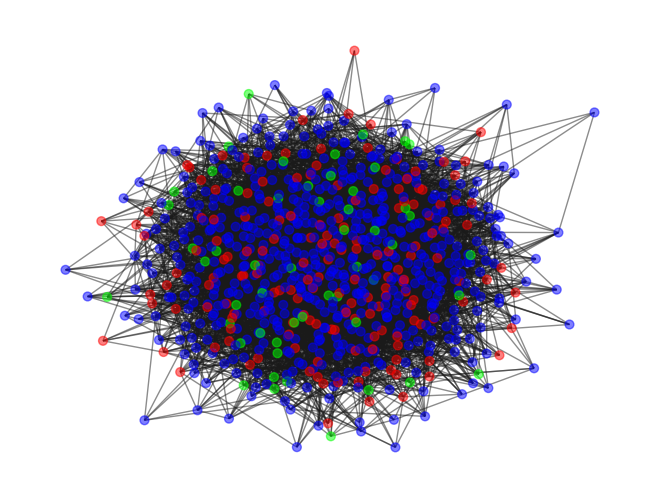

In [59]:
nx.draw(
    G = G_sbm, 
    node_size = 40, 
    node_color = node_attr_sbm, 
    alpha = .5, 
    cmap = plt.cm.brg
)

The SBM as we have discussed it is not analytical because the mixing pattern does not emerge from the node behavior (the data) but is simply provided as a modeling input. Like the WS model, it can be used for benchmarking purposes.

<div class='alert alert-block alert-warning'>
<b>Additional resources</b>

The SBM also comes as an algorithm that detects latent block structure which is assumed to have generated the network data (revisit [Session D1. Micro-level network analysis and community detection](1_micro_level_network_analysis_and_community_detection.ipynb)). In its Bayesian version, the SBM can be said to be analytical because the way the blocks are inferred mirrors the feedback loop of emergence and causation. The Bayesian SBM is implemented in the [graph-tool](https://graph-tool.skewed.de/) package. McLevey (2022, ch. 30) discusses this model and an application. To try the model yourself, check out [this repository](https://github.com/gesiscss/graph-tool). It is binder-ready, which means, you can work in the cloud.
</div>

#### Model comparison

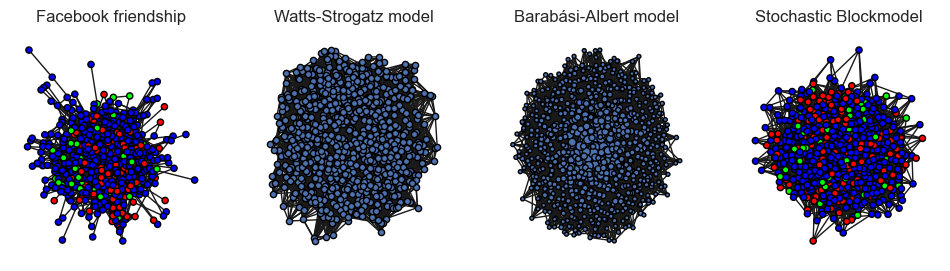

In [60]:
networks = [G_fb, G_ws, G_ba, G_sbm]
node_sizes = [20, 20, degree_ba, 20]
node_colors = [[data['sex'] for v, data in G_fb.nodes(data=True)], None, None, node_attr_sbm]
titles = ['Facebook friendship', 'Watts-Strogatz model', 'Barabási-Albert model', 'Stochastic Blockmodel']

fig, axs = plt.subplots(1, 4, figsize=(12, 3))
for i in range(4):
    axs[i].set_title(titles[i])
    nx.draw(
        G = networks[i], 
        ax = axs[i], 
        node_size = node_sizes[i], 
        node_color = node_colors[i], 
        edgecolors = 'black', 
        cmap = plt.cm.brg
    )

In [61]:
stats_fb = pd.DataFrame(index=titles)
stats_fb['c'] = [c_fb, c_ws, nx.average_clustering(G_ba), nx.average_clustering(G_sbm)]
stats_fb['l'] = [l_fb, l_ws, nx.average_shortest_path_length(G_ba), nx.average_shortest_path_length(G_sbm)]
stats_fb['skewness'] = [skew_fb, skew([k for v, k in G_ws.degree()]), skew([k for v, k in G_ba.degree()]), skew([k for v, k in G_sbm.degree()])]
stats_fb['mixing'] = ['Yes', 'No', 'No', 'Yes']
stats_fb.round(2)

,c,l,skewness,mixing
Facebook friendship,0.32,2.98,2.13,Yes
Watts-Strogatz model,0.32,3.01,0.12,No
Barabási-Albert model,0.06,2.62,3.95,No
Stochastic Blockmodel,0.02,2.72,0.38,Yes


To sum up, we have modeled the Facebook friendship network (shown in the left panel of the figure above) in three different ways. The topological WS model (second from left) succeeds in generating the Small-World structure of the empirical network ($C$ and $L$), but it does not generate the observed degree inequality as measured by its skewness. The BA model (second from right) generates too much degree inequality, the SBM (right) generates not enough degree inequality, and both fail in generating the observed clustering, but both generate characteristic paths of about the right length (because they both generate biased forms of random networks).

A model that is realistic in all dimensions, including sex segregation, hence, must combine properties of all three models. A step in this direction is the model by Karimi *et al.* (2018) which combines preferential attachment and attribute-based mixing. The Random Walk Model (Menczer *et al.*, 2020, ch. 5.5.3) blends preferential attachment and triadic closure. Such models are not available in NetworkX, but they can be built using its tools.

## D2.5. Hashtag co-occurrence network analysis

Up until here, we have exclusively worked with social networks where nodes are capable of actively exhibiting behavior. Cultural networks where nodes are not actors but concepts or symbols are often much larger, and inequality is typically more pronounced. Here, we briefly dive into the analysis of a cultural network in which nodes are Twitter hashtags and edges give the (normalized) number of times that two hashtags have co-occurred in tweets related to COVID-19 in May 2020. The nodelist and edgelist have been constructed in [Session A2: Data management with Pandas](../a_introduction/2_data_management_with_pandas.ipynb) and [Session A3: Scientific computing and data visualization](../a_introduction/3_scientific_computing_and_data_visualization.ipynb), respectively.

Load the data (lines 1-2), remove self-loops (line 3), construct a graph `G_hashtag_cooccurrences` (lines 4-10), and extract its largest connected component (line 11):

In [62]:
hashtags = pd.read_csv('../data/TweetsCOV19/TweetsCOV19_tables/hashtags.tsv.gz', sep='\t', index_col=None, encoding='utf-8')
hashtag_cooccurrences = pd.read_csv('../data/TweetsCOV19/hashtag_cooccurrences.tsv.gz', sep='\t', index_col=None, encoding='utf-8')
hashtag_cooccurrences = hashtag_cooccurrences[hashtag_cooccurrences['hashtag_idx_i'] != hashtag_cooccurrences['hashtag_idx_j']].reset_index(drop=True)
G_hashtag_cooccurrences = nx.from_pandas_edgelist(
    df = hashtag_cooccurrences, 
    source = 'hashtag_idx_i', 
    target = 'hashtag_idx_j', 
    edge_attr = ['cooccurrence', 'cooccurrence_norm'], 
    create_using = nx.Graph
)
G_hashtag_cooccurrences_lcc = G_hashtag_cooccurrences.subgraph(sorted(nx.connected_components(G_hashtag_cooccurrences), key=len, reverse=True)[0])

|<img src='images/G_hashtag_cooccurrences.png' style='float: right; width: 480px'>|
|:--|
|<em style='float: center'>**Figure 3**: TweetsCOV19 hashtag co-occurrence network</em>|

With 226,436 nodes and 1,864,812 edges, the largest connected component is much too large to draw it and perform certain analyses in NetworkX. ***Figure 3*** shows the whole network. The image has been produced in graph-tool which is fast enough because the core data structures and algorithms are implemented in the C++ language.

<div class='alert alert-block alert-info'>
<big><b>Insight: Big data network analysis</b></big>

Your data is "big" when you cannot process it on your local machine. But the choice of software package can make a difference. For the hashtag network with almost 2 million edges, computing the average clustering coefficient takes about one hour (on a machine with an Intel i7 CPU). The average shortest path length is computationally too expensive to obtain at all. With graph-tool, however, which is optimized for speed, the average clustering coefficient arrives within ten seconds and the average shortest path length within one hour.
</div>

#### Small-World analysis

In the following, the two Small-World scores `c_hashtags` and `l_hashtags` have been computed in graph-tool outside this session:

In [63]:
n_hashtags = G_hashtag_cooccurrences_lcc.number_of_nodes()
m_hashtags = G_hashtag_cooccurrences_lcc.number_of_edges()
p_hashtags = nx.density(G=G_hashtag_cooccurrences_lcc)
c_hashtags = 0.75261451
l_hashtags = 3.27701117
c_hashtags_random = p_hashtags
l_hashtags_random = average_shortest_path_length_random(n=n_hashtags, m=m_hashtags)
c_hashtags_norm = c_hashtags / p_hashtags
l_hashtags_norm = l_hashtags / l_hashtags_random
q_hashtags = c_hashtags_norm / l_hashtags_norm

In [64]:
stats.loc['Hashtag co-occurrences'] = [
    n_hashtags, 
    m_hashtags, 
    p_hashtags, 
    c_hashtags, 
    l_hashtags, 
    c_hashtags_random, 
    l_hashtags_random, 
    c_hashtags_norm, 
    l_hashtags_norm, 
    q_hashtags
]
stats[['n', 'm']] = stats[['n', 'm']].astype(int)
stats[['p', 'c_random']] = stats[['p', 'c_random']].round(5)
stats[['c', 'l', 'l_random', 'c_norm', 'l_norm', 'q']] = stats[['c', 'l', 'l_random', 'c_norm', 'l_norm', 'q']].round(2)
stats

,n,m,p,c,l,c_random,l_random,c_norm,l_norm,q
Facebook friendship,800,6418,0.02008,0.32,2.98,0.02008,2.70,15.70,1.10,14.23
Text messages & phone calls,194,215,0.01148,0.10,9.99,0.01148,6.39,8.79,1.56,5.62
Face-to-face interaction,110,368,0.06138,0.41,3.99,0.06138,2.67,6.60,1.49,4.42
Hashtag co-occurrences,226436,1864812,0.00007,0.75,3.28,0.00007,4.70,10346.57,0.70,14823.94


The table harbors the fascinating result that the hashtag co-occurrence network has an extremely pronounced Small-World structure. Clustering is about 10,000 times stronger than expected by chance, and the characteristic path length is even shorter than of a comparable random graph.

Cancho & Solé (2001) propose that the Small-World structure of language networks (the hashtag network is an example) is related to the efficiency of language use: words or hashtags get their meaning from context. A large clustering coefficient, thus, reflects the richness of meanings that can be transported with language. The approximately three degrees of separation signal that, even though the menu of hashtags is huge, any hashtag can be reached with about two intermediate hashtags and rich communication can be attained with little increase in effort.

#### Scale-free analysis

Create the degree sequence how many other hashtags a hashtag co-occurrs with...

In [65]:
degree_hashtags = [k for v, k in G_hashtag_cooccurrences_lcc.degree()]

and fit a power law to the degree distribution. Let the algorithm identify the lower cutoff `xmin`:

In [66]:
fit_hashtags = powerlaw.Fit(data=degree_hashtags, xmin=None)

Calculating best minimal value for power law fit


In [67]:
print('Lower cutoff:', fit_hashtags.xmin)
print('Exponent:', fit_hashtags.alpha)

Lower cutoff: 10.0
Exponent: 2.2863519885195025


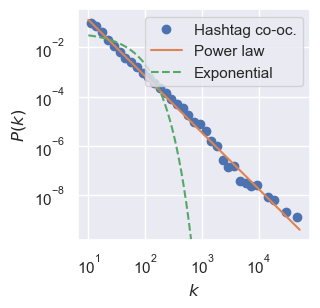

In [68]:
plt.figure(figsize=[3, 3])
fig = fit_hashtags.plot_pdf(marker='o', linestyle='', label='Hashtag co-oc.')
fit_hashtags.power_law.plot_pdf(linestyle='-', label='Power law')
fit_hashtags.exponential.plot_pdf(linestyle='--', label='Exponential')
plt.ylim(1.50e-10, 0.34)
plt.legend()
plt.xlabel('$k$')
plt.ylabel('$P(k)$')
plt.show()

At and above a degree of 10, the hashtag network is scale-free with an exponent of approximately 2.3. The higher the degree of a hashtag, the higher its availability (Cancho & Solé, 2001). Few hashtags, thus, are shared by a large fraction of the Twitter community. They provide a common sense for communication and span a space of possible communication which is then hierarchically fine-structured by hashtags with smaller degrees.

Since the exponent is small, the skewness of the degree distribution is extreme...

In [69]:
skew(degree_hashtags)

186.1461440987919

which makes the inequality 3-4 times larger than in the social networks:

In [70]:
inequality(degree_hashtags)

0.13280425707731458

We can say as a rule of thumb that social networks are not scale-free but cultural networks are.

This concludes Session D2. Next, we leave network analysis behind and move on to [Session D3. Unsupervised machine learning](3_unsupervised_machine_learning.ipynb).

## References

### Recommended readings

Fuhse, J. (2021). *Social Networks of Meaning and Communication*. Oxford University Press. https://doi.org/10.1093/oso/9780190275433.001.0001. *Accessible account of sociological network theory that delves deep into the mutual constitution of social networks and communication networks. For this session, read **ch. 7** on the process aspect of networks.*

Menczer, F., Fortunato, S., & Davis, C. A. (2020). *A First Course in Network Science*. Cambridge University Press. https://doi.org/10.1017/9781108653947. *An introductory course with exercises that emerged from years of teaching network analysis using NetworkX. Written from the physicist's perspective, this book is focused on the network science paradigms of small-world networks, scale-free networks, community detection, and complex systems modeling. The [website](https://cambridgeuniversitypress.github.io/FirstCourseNetworkScience/) provides all code in the form of Jupyter Notebooks, data, and solutions to the exercises. For this session, read **chs. 2 and 5** on Small-World structure and network modeling.*

Page, S. E. (2015). "What sociologists should know about complexity." *Annual Review of Sociology* 41:21–41. https://doi.org/10.1146/annurev-soc-073014-112230. *The title is what you get. The author reviews concepts from complexity science that tend to be neglected in other accounts.* 

### Complementary readings

Barabási, A.-L. & Albert, R. (1999). "Emergence of scaling in random networks." *Science* 286:509–512. https://doi.org/10.1126/science.286.5439.509. *A foundational paper in Network Science on heterogeneous degree distributions and an origin of power laws in complex network.*

Cancho, R. F. i & Solé, R. V. (2001). "The small world of human language." *Proceedings of the Royal Society of London B* 268:2261–2265. https://doi.org/10.1098/rspb.2001.1800. *The first work that detected Small-World structure for a language network (cultural network).*

Karimi, F., Génois, M., Wagner, C., Singer, P., & Strohmaier, M. (2018). "Homophily influences ranking of minorities in social networks." *Scientific Reports* 8:11077. https://doi.org/10.1038/s41598-018-29405-7. *Generative model and analysis of effects that have their origin in the combination of preferential attachment and block structure.*

Keuschnigg, M., Lovsjö, N., & Hedström, P. (2018). "Analytical sociology and computational social science." *Journal of Computational Social Science* 1:3–14. https://doi.org/10.1007/s42001-017-0006-5. *A programmatic piece about analytical and relational approaches in CSS.*

McLevey, J. (2022). *Doing Computational Social Science: A Practical Introduction*. SAGE. https://us.sagepub.com/en-us/nam/doing-computational-social-science/book266031. *A rather complete introduction to the field with well-structured and insightful chapters also on centrality analysis and community detection. The [website](https://github.com/UWNETLAB/dcss_supplementary) offers the code used in the book.*

Moody, J. & White, D. R. (2003). "Structural cohesion and embeddedness: A hierarchical concept of social groups." *American Sociological Review* 68:103–127. https://doi.org/10.2307/3088904. *Sociological application of core/periphery analysis in the context of social cohesion.*

Ugander, J., Karrer, B., Backstrom, L., & Marlow, C. (2011). "The anatomy of the Facebook social graph." *arXiv*:1111.4503. https://doi.org/10.48550/arXiv.1111.4503. *This paper demonstrated empirically that the result from the Small-World experiment that individuals are separated by six degrees actually generalizes to the global Facebook friendship network.*

Watts, D. J. & Strogatz, S. H. (1998). "Collective dynamics of 'small-world' networks." *Nature* 393:440–442. https://doi.org/10.1038/30918. *Another foundational paper in Network Science on a network topology that potentially underlies the Small-World phenomenon of six degrees of separation.*

<div class='alert alert-block alert-success'>
<b>Document information</b>

Contact and main author: Haiko Lietz & N. Gizem Bacaksizlar Turbic

Version date: 30 June 2023

License: ...
</div>